# <center>Unsupervised learning algorithms - K-means</center>
<center>Machine Learning lab 6</center>
<center>24.11.2022</center>
<center>Miłosz Segedyn</center>

## K-means clustering
### example 1

In [19]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

Create example cluster data

In [20]:
X, y_true = make_blobs(n_samples=120, centers=4, cluster_std=0.4, n_features=2, random_state=1)

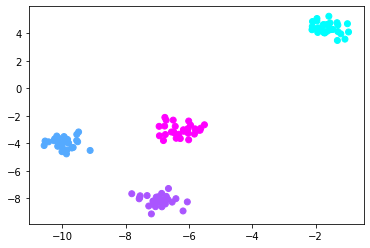

In [21]:
plt.scatter(X.transpose()[0], X.transpose()[1], c=y_true, cmap='cool')
plt.show()

Solving with k-means shows correct clusterisation.

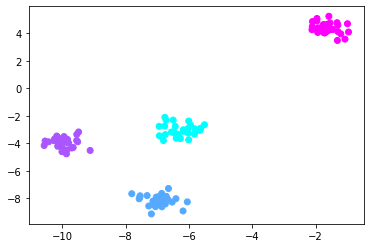

In [22]:
kmeans = KMeans(n_clusters=4, init='random', random_state=1).fit(X)
y_predict = kmeans.predict(X)
plt.scatter(X.transpose()[0], X.transpose()[1], c=y_predict, cmap='cool')
plt.show()

In [23]:
kmeans.inertia_

34.087957540286894

### example 2

Creating example clusters with bigger standard deviation:

In [24]:
X, y_true = make_blobs(n_samples=120, centers=5, cluster_std=0.9, n_features=2, random_state=1)

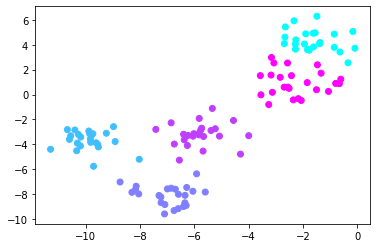

In [25]:
plt.scatter(X.transpose()[0], X.transpose()[1], c=y_true, cmap='cool')
plt.show()

With bigger standard deviation, k-means algorithm has minor errors.

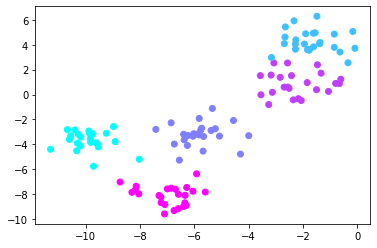

In [26]:
kmeans = KMeans(n_clusters=5, init='random', random_state=1).fit(X)
y_predict = kmeans.predict(X)
plt.scatter(X.transpose()[0], X.transpose()[1], c=y_predict, cmap='cool')
plt.show()

In [27]:
kmeans.inertia_

160.76714981024614

Less number of predefined cluster results in incorrect clusterisation.

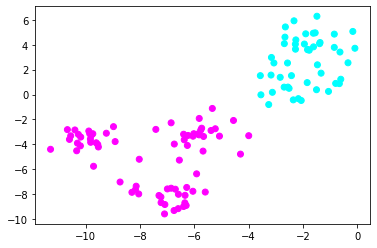

In [28]:
kmeans = KMeans(n_clusters=2, init='random', random_state=1).fit(X)
y_predict = kmeans.predict(X)
plt.scatter(X.transpose()[0], X.transpose()[1], c=y_predict, cmap='cool')
plt.show()

In [29]:
kmeans.inertia_

868.6555195974264

## K-means ++

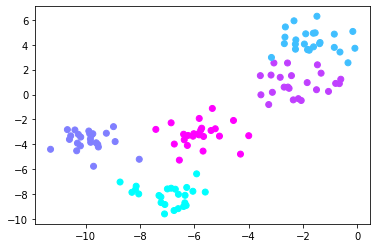

In [30]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1).fit(X)
y_predict = kmeans.predict(X)
plt.scatter(X.transpose()[0], X.transpose()[1], c=y_predict, cmap='cool')
plt.show()

In [31]:
kmeans.inertia_

160.76714981024617

### Elbow method

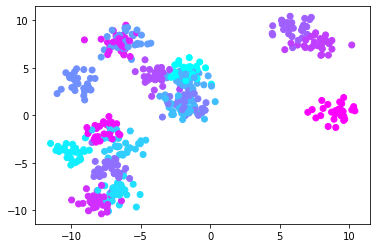

In [32]:
X, y_true = make_blobs(n_samples=500, centers=17, cluster_std=0.8, n_features=2, random_state=1)
plt.scatter(X.transpose()[0], X.transpose()[1], c=y_true, cmap='cool')
plt.show()

In [33]:
inertiaList = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1).fit(X)
    inertiaList.append(kmeans.inertia_)


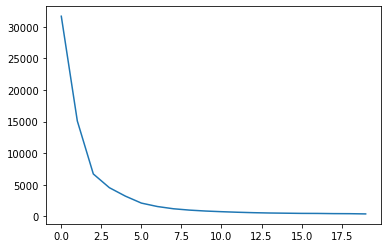

In [34]:
plt.plot(inertiaList)
plt.show()

From elbow method, the optimal number of clusters for this task is 8.

### Moon shape clusterisation

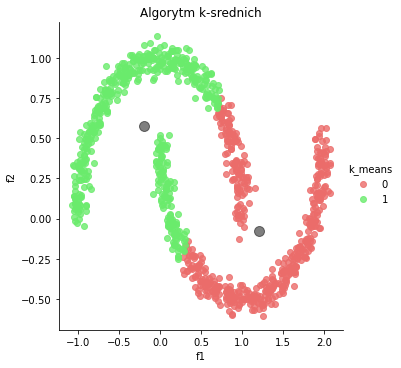

In [35]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=1).fit(X_moon)
y_km = kmeans.predict(X_moon)
centers = kmeans.cluster_centers_

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()